# QTW - Final - EDA

In [67]:
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline 

## Load Data

In [68]:
data = pd.read_csv('final_project.csv')

In [69]:
data.head()

x0        x1         x2        x3        x4         x5         x6  \
0 -0.166563 -3.961588   4.621113  2.481908 -1.800135   0.804684   6.718751   
1 -0.149894 -0.585676  27.839856  4.152333  6.426802  -2.426943  40.477058   
2 -0.321707 -1.429819  12.251561  6.586874 -5.304647 -11.311090  17.812850   
3 -0.245594  5.076677 -24.149632  3.637307  6.505811   2.290224 -35.111751   
4 -0.273366  0.306326 -11.352593  1.676758  2.928441  -0.616824 -16.505817   

          x7        x8        x9  ...        x41       x42       x43  \
0 -14.789997 -1.040673 -4.204950  ...  -1.497117  5.414063 -2.325655   
1  -6.725709  0.896421  0.330165  ...  36.292790  4.490915  0.762561   
2  11.060572  5.325880 -2.632984  ...  -0.368491  9.088864 -0.689886   
3 -18.913592 -0.337041 -5.568076  ...  15.691546 -7.467775  2.940789   
4  27.532281  1.199715 -4.309105  ... -13.911297 -5.229937  1.783928   

        x44       x45        x46       x47       x48        x49  y  
0  1.674827 -0.264332  60.781427 -7.689696  0.151589  -8.040166  0  
1  6.526662  1.007927  15.805696 -4.896678 -0.320283  16.719974  0  
2 -2.731118  0.754200  30.856417 -7.428573 -2.090804  -7.869421  0  
3 -6.424112  0.419776 -72.424569  5.361375  1.806070  -7.670847  0  
4  3.957801 -0.096988 -14.085435 -0.208351 -0.894942  15.724742  1  

[5 rows x 51 columns]

## Boxplots

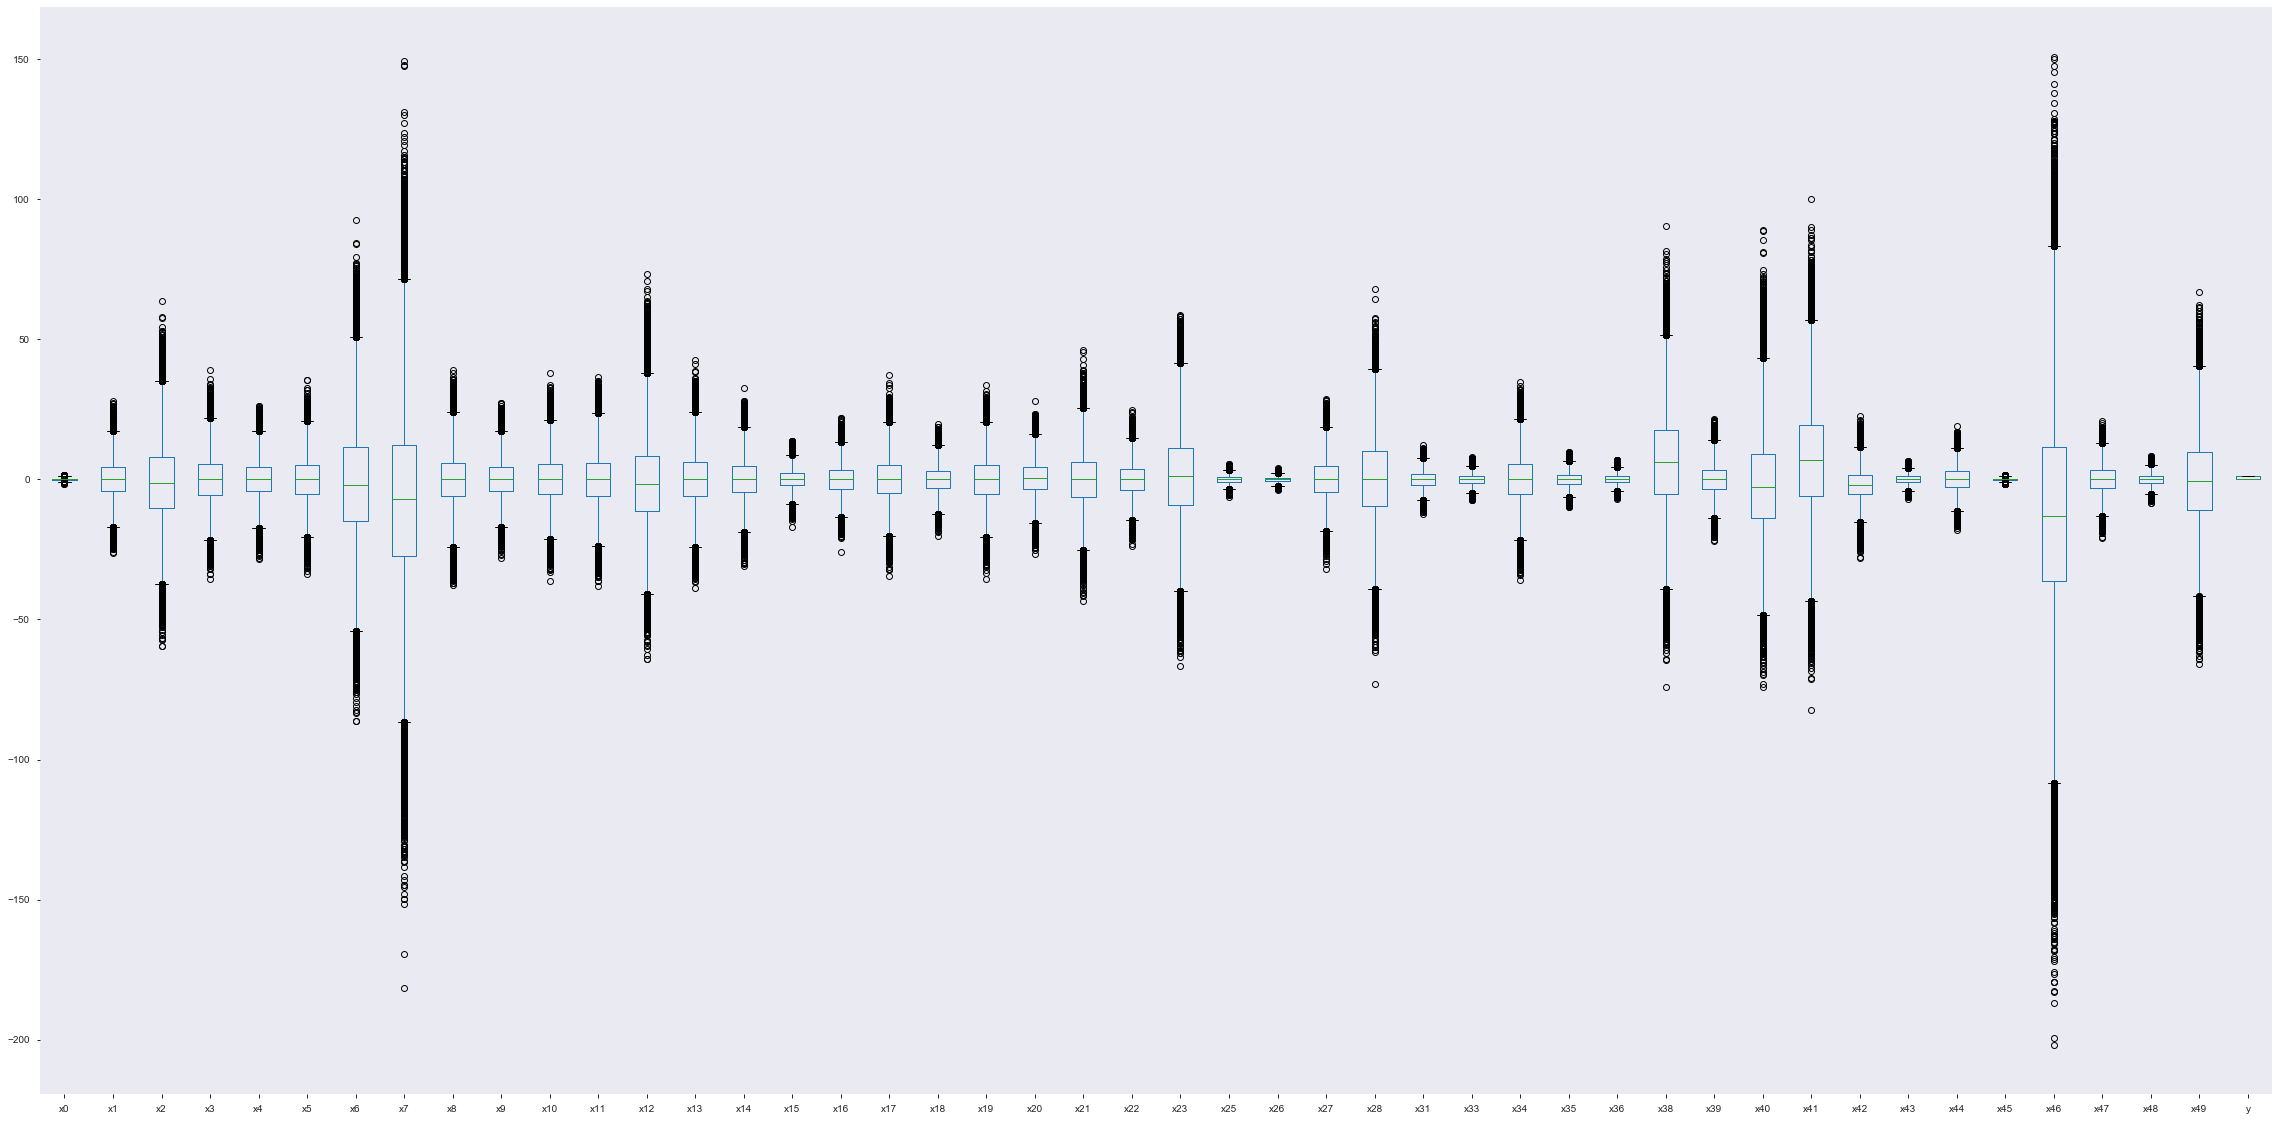

In [70]:
data.boxplot(grid = False,figsize=(40,20)) #figsize=(Width,Height)

## Boxplot By Y Attribute

In [71]:
data.y.unique()

array([0, 1], dtype=int64)

In [72]:
data_zero = data[data['y']== 0]
data_one = data[data['y']== 1]

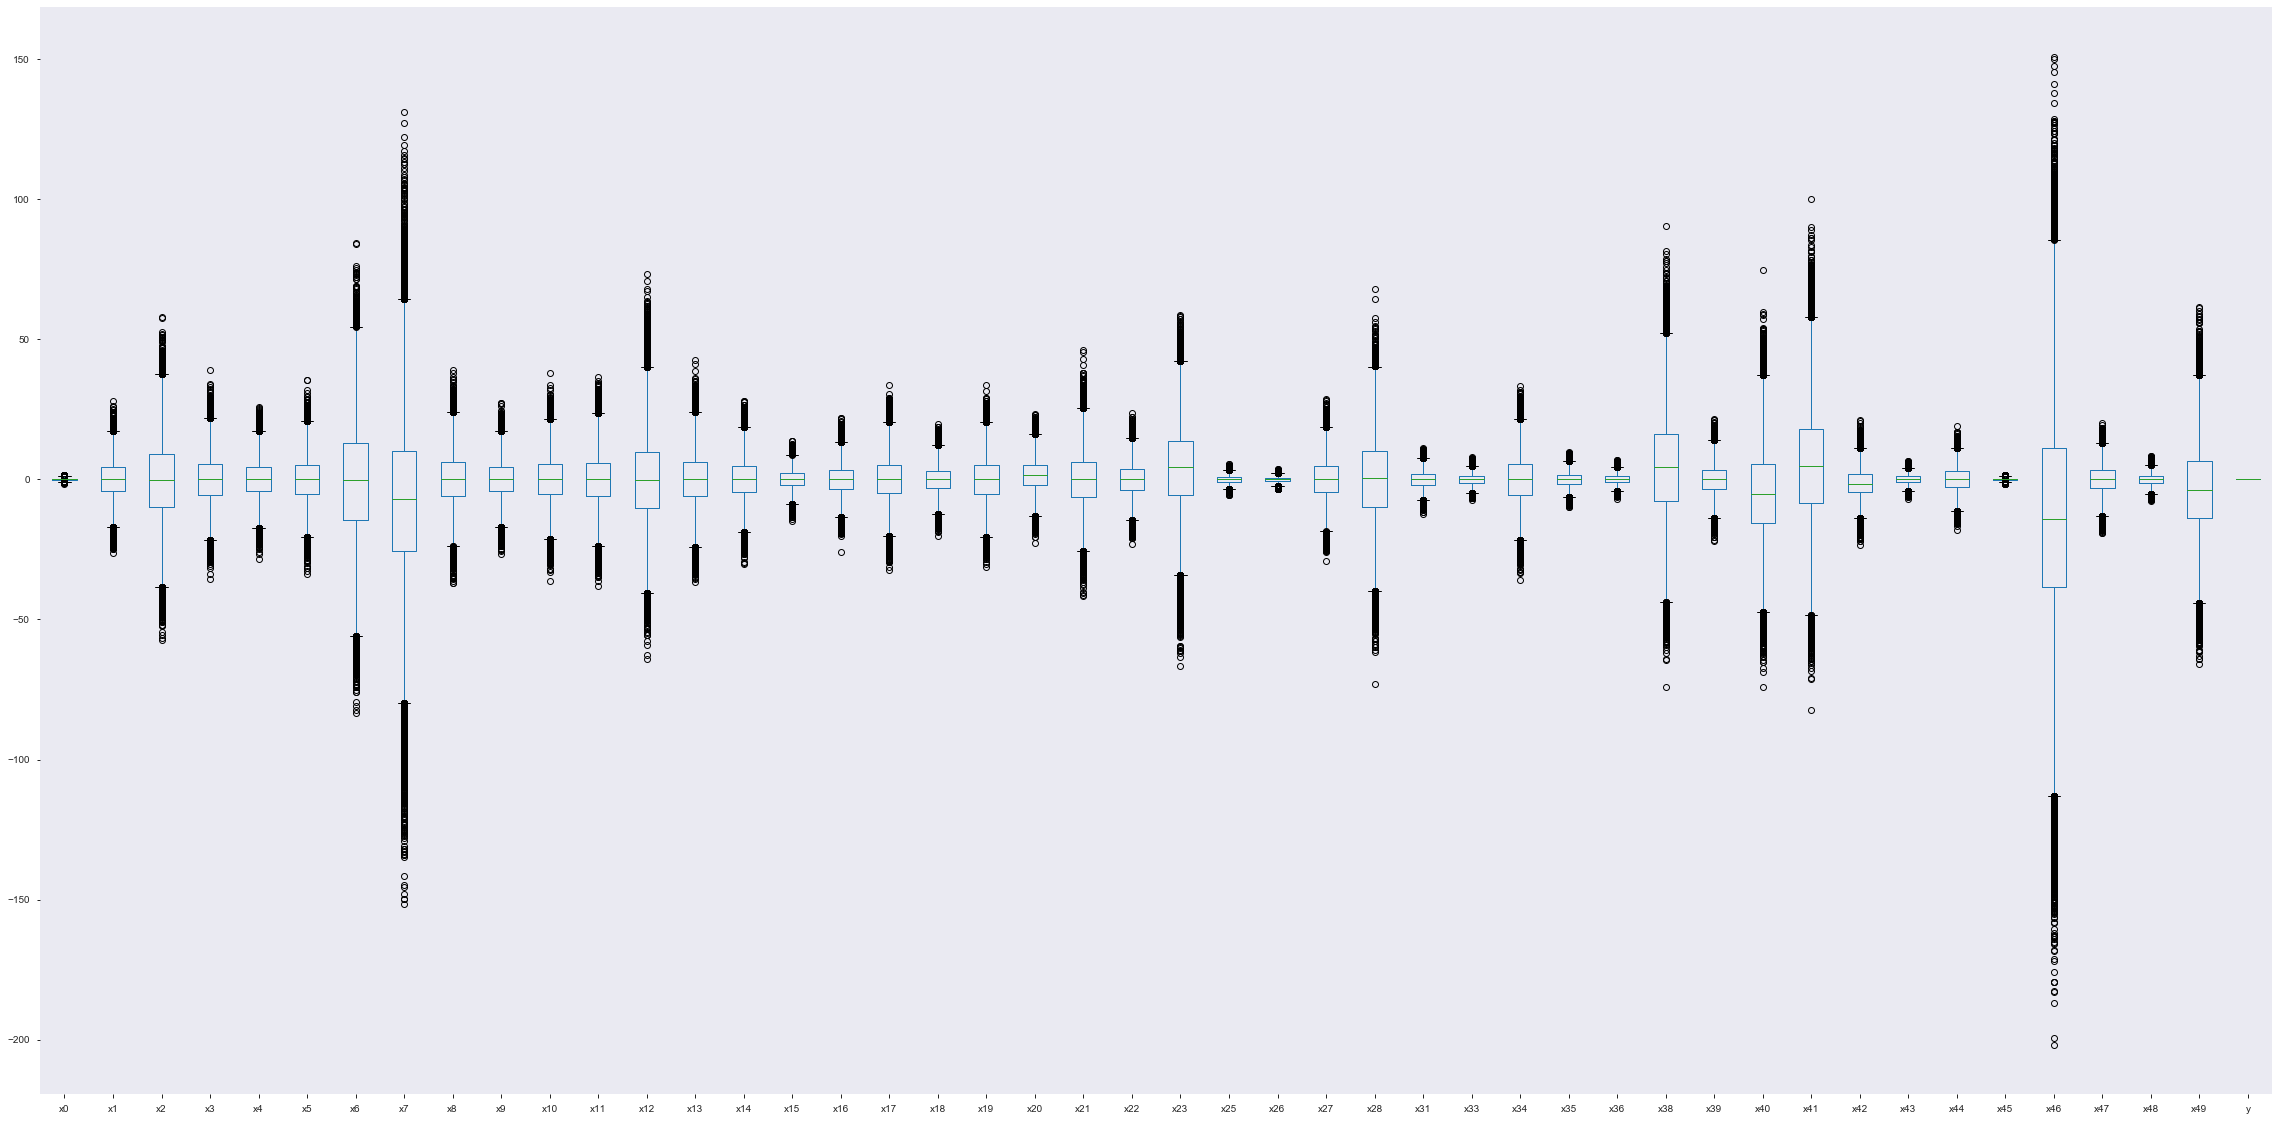

In [73]:
data_zero.boxplot(grid = False, figsize=(40,20)) #figsize=(Width,Height)

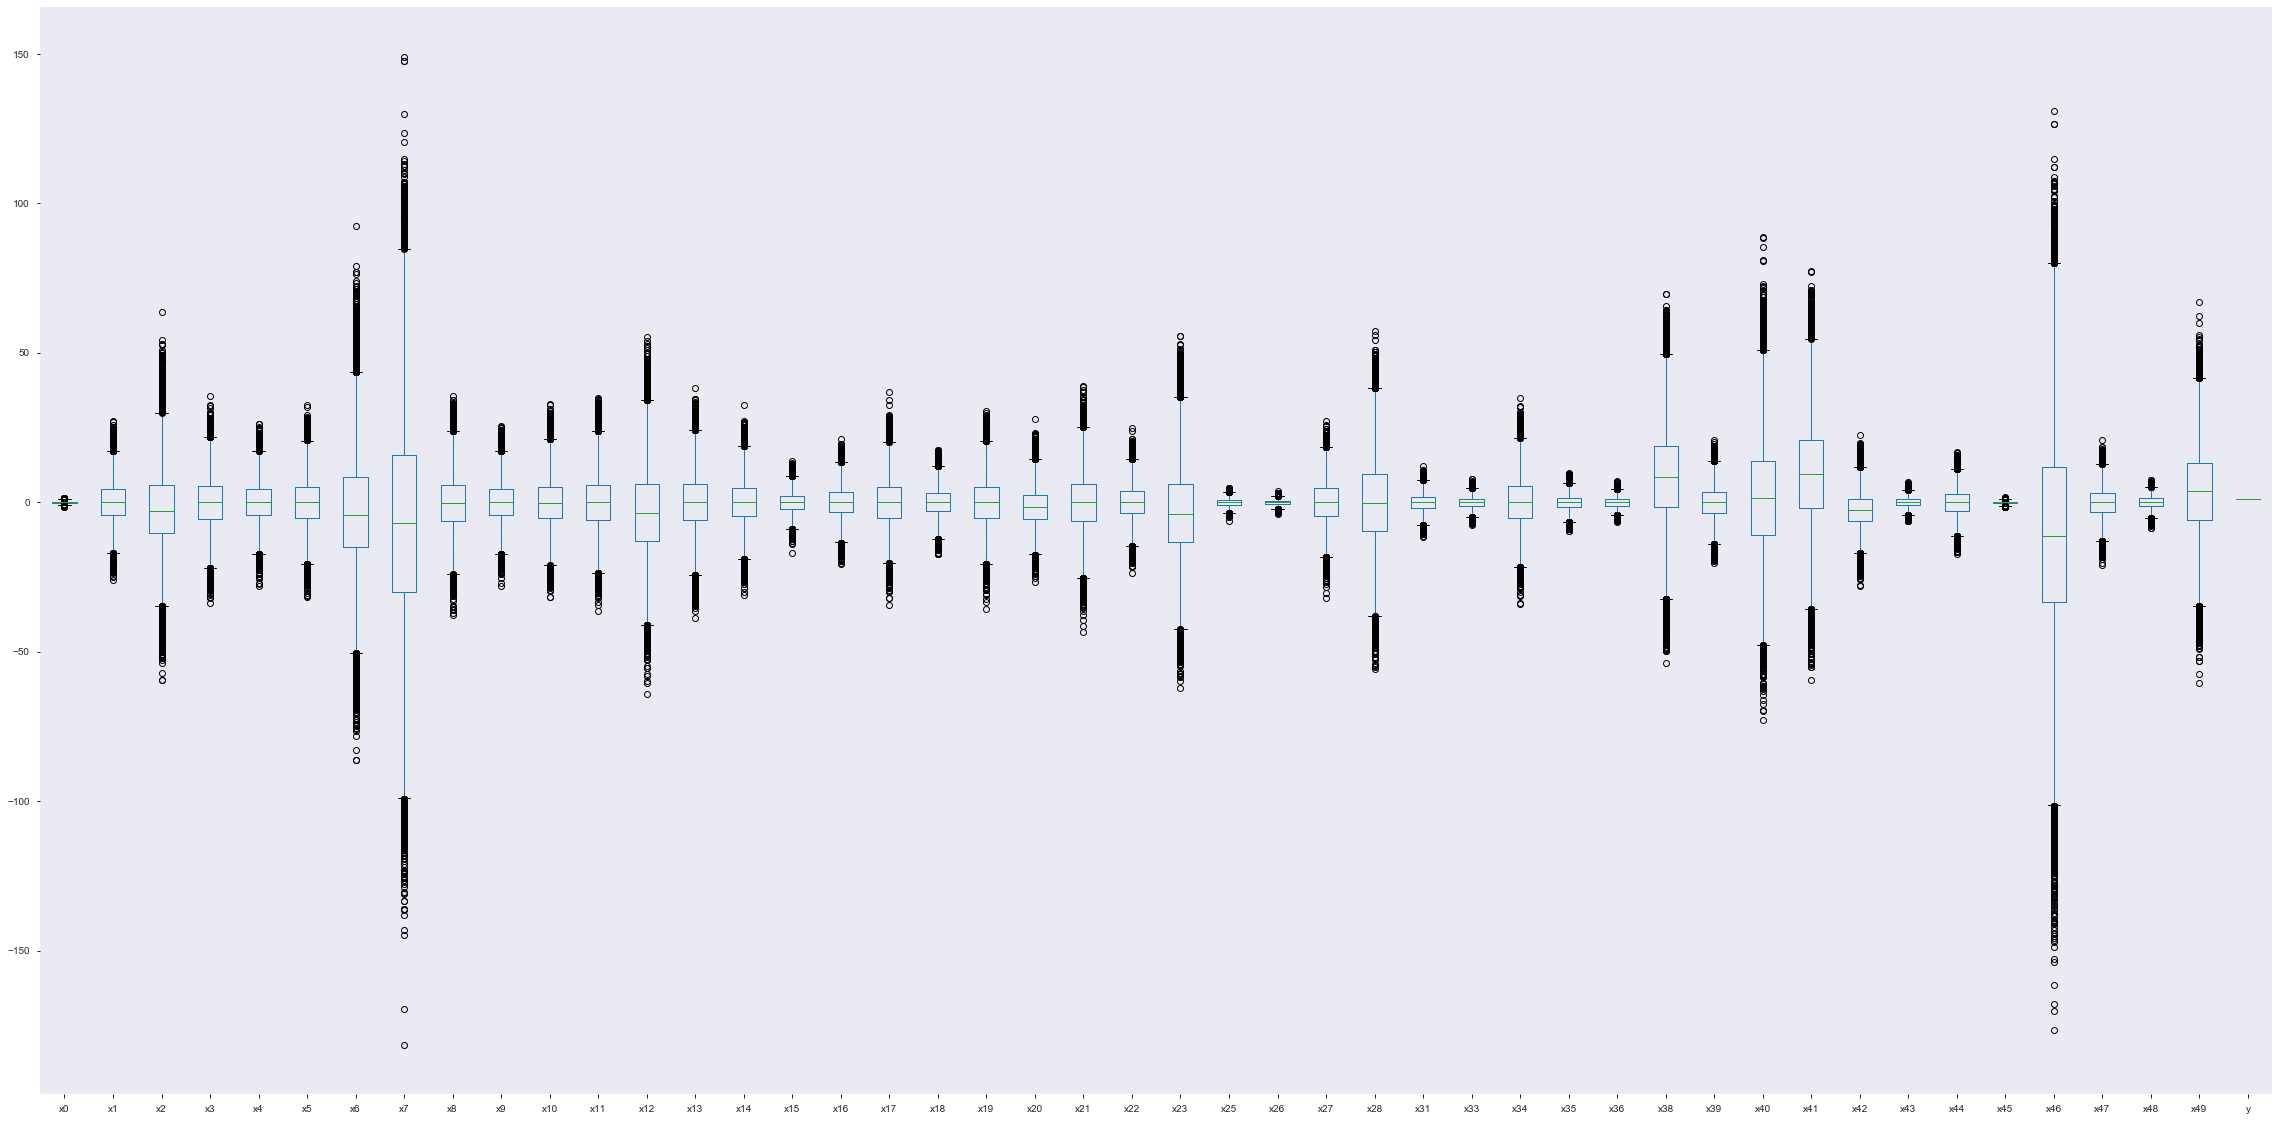

In [74]:
data_one.boxplot(grid = False, figsize=(40,20)) #figsize=(Width,Height)

### Delete temp datasets


In [75]:
del([data_zero, data_one])

## Pandas Profile data

In [76]:
profile = pandas_profiling.ProfileReport(data)

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [77]:
profile

As a result of the above Profiling analysis, which was 
 - x6 is highly correlated with x2 (ρ = 1) Rejected
 - x41 is highly correlated with x38 (ρ = 1) Rejected

Attributes X2 and x38 will be removed from the data set.

In [78]:
drop_columns = ['x2', 'x38']
data = data.drop(drop_columns, 1)
del(drop_columns)

## Attributes x24, x29, x30, x37

- Convert x24, x29, and x30 Datatype to Categorical 
- Rename Attribute:
    - x24 to Continent
    - x29 to Month
    - x30 to DayOfWeek
    - x37 to Money

In [79]:
data.x24 = data.x24.astype('category')
data.x29 = data.x29.astype('category')
data.x30 = data.x30.astype('category')
data.rename(columns={'x24': 'Continent', 'x29': 'Month', 'x30': 'DayOfWeek', 'x37': 'Money'}, inplace=True)

### Standardize Continent

In [80]:
data['Continent'].unique().to_list()

['euorpe', 'asia', 'america', nan]

In [81]:
data['Continent'] = data['Continent'].apply(lambda x: x.replace('euorpe', 'Europe').replace('asia', 'Asia')\
                                            .replace('america', 'America'))

In [82]:
data['Continent'].unique().to_list()

['Europe', 'Asia', 'America', nan]

### Standardize Month Abbrevations

- Jan
- Feb
- Mar
- Apr
- May
- Jun
- Jul
- Aug
- Sep
- Oct
- Nov
- Dec

In [83]:
data.Month.unique().to_list()

['July',
 'Aug',
 'Jun',
 'May',
 'sept.',
 'Apr',
 'Nov',
 'Oct',
 nan,
 'Mar',
 'Feb',
 'Dev',
 'January']

In [84]:
data['Month'] = data['Month'].apply(lambda x: x.replace('January', 'Jan').replace('July', 'Jul').replace('sept.', 'Sep').replace('Dev','Dec'))

In [85]:
data.Month.unique().to_list()

['Jul',
 'Aug',
 'Jun',
 'May',
 'Sep',
 'Apr',
 'Nov',
 'Oct',
 nan,
 'Mar',
 'Feb',
 'Dec',
 'Jan']

### Standardize DayOfWeek Abbrevations

In [86]:
data.DayOfWeek.unique().to_list()

['tuesday', 'wednesday', 'thurday', 'monday', 'friday', nan]

In [87]:
data['DayOfWeek'] = data['DayOfWeek'].apply(lambda x: x.replace('monday', 'Mon').replace('tuesday', 'Tue').replace('wednesday', 'Wed')\
                                            .replace('thurday','Thu').replace('friday','Fri'))

In [88]:
data.DayOfWeek.unique().to_list()

['Tue', 'Wed', 'Thu', 'Mon', 'Fri', nan]

### Money Attribute

In [89]:
data['Money'] = data['Money'].astype('str')

In [90]:
data['Money'] = data['Money'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 49 columns):
x0           159974 non-null float64
x1           159975 non-null float64
x3           159963 non-null float64
x4           159974 non-null float64
x5           159963 non-null float64
x6           159974 non-null float64
x7           159973 non-null float64
x8           159979 non-null float64
x9           159970 non-null float64
x10          159957 non-null float64
x11          159970 non-null float64
x12          159964 non-null float64
x13          159969 non-null float64
x14          159966 non-null float64
x15          159965 non-null float64
x16          159974 non-null float64
x17          159973 non-null float64
x18          159960 non-null float64
x19          159965 non-null float64
x20          159962 non-null float64
x21          159971 non-null float64
x22          159973 non-null float64
x23          159953 non-null float64
Continent    159972 non-null category


### Convert x32 column from object to float

In [92]:
data.x32 = data.x32.str.strip('%')
data.x32 = data.x32.astype('float')

In [93]:
data.to_csv('final_project_mod.csv', index=False)

# Update Null Values

In [94]:
del(data)

In [95]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

## Load Data

In [96]:
data = pd.read_csv('final_project_mod.csv', dtype = {'Continent': 'category', 'Month':'category', 'DayOfWeek':'category'})

### Explicitly Define Order Category for Month and DayOfWeek

In [97]:
from pandas.api.types import CategoricalDtype

In [98]:
# The fist step in ordering a category feature is to define a custom order by way of CategoricalDtype
month_ordered_categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Next, the attribute needs to be explicitly re_ordered:
cat_dtype = pd.api.types.CategoricalDtype(categories=month_ordered_categories, ordered=True)
data.Month = data.Month.astype(cat_dtype)

# Repeat steps for DayOfWeek
dayofweek_ordered_categories = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']
cat_dtype = pd.api.types.CategoricalDtype(categories=dayofweek_ordered_categories, ordered=True)
data.DayOfWeek = data.DayOfWeek.astype(cat_dtype)

# Repate Steps for Continent
# Ordering based upon population
continent_ordered_categories = ['Asia', 'America', 'Europe']
cat_dtype = pd.api.types.CategoricalDtype(categories=continent_ordered_categories, ordered=True)
data.Continent = data.Continent.astype(cat_dtype)


In [99]:
data.Month.astype("category").cat.codes.unique()

array([ 6,  7,  5,  4,  8,  3, 10,  9, -1,  2,  1, 11,  0], dtype=int64)

In [100]:
data['Month'].dtypes

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
                 ordered=True)

In [101]:
data.DayOfWeek.astype("category").cat.codes.unique()

array([ 1,  2,  3,  0,  4, -1], dtype=int64)

In [102]:
data['DayOfWeek'].dtypes

CategoricalDtype(categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri'], ordered=True)

In [103]:
data.Continent.astype("category").cat.codes.unique()

array([ 2,  0,  1, -1], dtype=int64)

In [104]:
data['Continent'].dtypes

CategoricalDtype(categories=['Asia', 'America', 'Europe'], ordered=True)

## Replace NaN records with column Mean

In [105]:
column_means = {} 
for column in data.columns:
    if (data[column].dtype.name != "category" and column != 'y'):
        column_means[column] = data[column].mean()

In [106]:
for key in column_means:
    data[key] = data[key].fillna(column_means[key])

### Check that we no longer have nulls in our numeric columns.

In [107]:
data.isnull().sum()

x0            0
x1            0
x3            0
x4            0
x5            0
x6            0
x7            0
x8            0
x9            0
x10           0
x11           0
x12           0
x13           0
x14           0
x15           0
x16           0
x17           0
x18           0
x19           0
x20           0
x21           0
x22           0
x23           0
Continent    28
x25           0
x26           0
x27           0
x28           0
Month        30
DayOfWeek    30
x31           0
x32           0
x33           0
x34           0
x35           0
x36           0
Money         0
x39           0
x40           0
x41           0
x42           0
x43           0
x44           0
x45           0
x46           0
x47           0
x48           0
x49           0
y             0
dtype: int64

### Remove records with null continent, month, or day of week.

In [108]:
data.count

<bound method DataFrame.count of               x0        x1         x3        x4         x5         x6  \
0      -0.166563 -3.961588   2.481908 -1.800135   0.804684   6.718751   
1      -0.149894 -0.585676   4.152333  6.426802  -2.426943  40.477058   
2      -0.321707 -1.429819   6.586874 -5.304647 -11.311090  17.812850   
3      -0.245594  5.076677   3.637307  6.505811   2.290224 -35.111751   
4      -0.273366  0.306326   1.676758  2.928441  -0.616824 -16.505817   
...          ...       ...        ...       ...        ...        ...   
159995 -0.487024 -4.270269  -1.992423  1.757552  -1.167819   0.606860   
159996  0.825477  4.804368  11.371303  1.715901   6.990759  32.221207   
159997 -0.802489  5.362696  -7.496074  2.295250  -2.756067  10.531388   
159998  0.339237  7.609895  -2.825481  4.046102  15.322603   7.805271   
159999 -0.296748 -0.412773  -5.633629 -4.028154  15.939428 -15.864365   

               x7         x8        x9        x10  ...        x41       x42  \
0      -14.

Proving there are NaN's within the first ten locations within the x0 column

In [109]:
data = data[pd.notnull(data.Continent)]
data = data[pd.notnull(data.Month)]
data = data[pd.notnull(data.DayOfWeek)]

In [110]:
data.count

<bound method DataFrame.count of               x0        x1         x3        x4         x5         x6  \
0      -0.166563 -3.961588   2.481908 -1.800135   0.804684   6.718751   
1      -0.149894 -0.585676   4.152333  6.426802  -2.426943  40.477058   
2      -0.321707 -1.429819   6.586874 -5.304647 -11.311090  17.812850   
3      -0.245594  5.076677   3.637307  6.505811   2.290224 -35.111751   
4      -0.273366  0.306326   1.676758  2.928441  -0.616824 -16.505817   
...          ...       ...        ...       ...        ...        ...   
159995 -0.487024 -4.270269  -1.992423  1.757552  -1.167819   0.606860   
159996  0.825477  4.804368  11.371303  1.715901   6.990759  32.221207   
159997 -0.802489  5.362696  -7.496074  2.295250  -2.756067  10.531388   
159998  0.339237  7.609895  -2.825481  4.046102  15.322603   7.805271   
159999 -0.296748 -0.412773  -5.633629 -4.028154  15.939428 -15.864365   

               x7         x8        x9        x10  ...        x41       x42  \
0      -14.

In [111]:
data.isnull().sum()

x0           0
x1           0
x3           0
x4           0
x5           0
x6           0
x7           0
x8           0
x9           0
x10          0
x11          0
x12          0
x13          0
x14          0
x15          0
x16          0
x17          0
x18          0
x19          0
x20          0
x21          0
x22          0
x23          0
Continent    0
x25          0
x26          0
x27          0
x28          0
Month        0
DayOfWeek    0
x31          0
x32          0
x33          0
x34          0
x35          0
x36          0
Money        0
x39          0
x40          0
x41          0
x42          0
x43          0
x44          0
x45          0
x46          0
x47          0
x48          0
x49          0
y            0
dtype: int64

In [112]:
data.to_csv('final_project_mod.csv', index=False)

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159912 entries, 0 to 159999
Data columns (total 49 columns):
x0           159912 non-null float64
x1           159912 non-null float64
x3           159912 non-null float64
x4           159912 non-null float64
x5           159912 non-null float64
x6           159912 non-null float64
x7           159912 non-null float64
x8           159912 non-null float64
x9           159912 non-null float64
x10          159912 non-null float64
x11          159912 non-null float64
x12          159912 non-null float64
x13          159912 non-null float64
x14          159912 non-null float64
x15          159912 non-null float64
x16          159912 non-null float64
x17          159912 non-null float64
x18          159912 non-null float64
x19          159912 non-null float64
x20          159912 non-null float64
x21          159912 non-null float64
x22          159912 non-null float64
x23          159912 non-null float64
Continent    159912 non-null category


# BEGIN MODEL

In [114]:
#define X

x = data.drop(['y'], axis = 1)

#define y

y = data['y']


x1 = pd.get_dummies(x,prefix = ['Continent', 'Month', 'DayOfWeek'])

In [115]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159912 entries, 0 to 159999
Data columns (total 65 columns):
x0                   159912 non-null float64
x1                   159912 non-null float64
x3                   159912 non-null float64
x4                   159912 non-null float64
x5                   159912 non-null float64
x6                   159912 non-null float64
x7                   159912 non-null float64
x8                   159912 non-null float64
x9                   159912 non-null float64
x10                  159912 non-null float64
x11                  159912 non-null float64
x12                  159912 non-null float64
x13                  159912 non-null float64
x14                  159912 non-null float64
x15                  159912 non-null float64
x16                  159912 non-null float64
x17                  159912 non-null float64
x18                  159912 non-null float64
x19                  159912 non-null float64
x20                  159912 non-nu

# Naive Bayes:  Gaussian

### assuming a normal distribution for the float64 datatypes given the earlier histogram plots

In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

model = GaussianNB()

model.fit(x1,y)

x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, random_state=102)

In [117]:
y_pred_gau = model.predict(x_test)

In [118]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_gau))
print(confusion_matrix(y_test, y_pred_gau))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_gau,y_test))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75     19301
           1       0.61      0.60      0.61     12682

   micro avg       0.69      0.69      0.69     31983
   macro avg       0.68      0.68      0.68     31983
weighted avg       0.69      0.69      0.69     31983

[[14457  4844]
 [ 5016  7666]]
accuracy is 0.6917112215864678


# MultinomialNB

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x1)

# Print out the adjustment that the scaler applied to the lepton pT column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[0],scaler.min_[0]))
#multiplied_by = scaler.scale_[0]
#added = scaler.min_[0]

scaled_train_df = pd.DataFrame(scaled_train, columns = x1.columns)

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [120]:
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=102)


from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(scaled_train_df,y)

y_pred_multi = model.predict(x_test)

In [121]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_multi))
print(confusion_matrix(y_test, y_pred_multi))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_multi,y_test))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     19301
           1       0.00      0.00      0.00     12682

   micro avg       0.60      0.60      0.60     31983
   macro avg       0.30      0.50      0.38     31983
weighted avg       0.36      0.60      0.45     31983

[[19301     0]
 [12682     0]]
accuracy is 0.6034768470750086


C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Bernoulli

In [122]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train, y_train)
 
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, random_state=102)
    
y_pred_ber = model.predict(x_test)

In [123]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_ber))
print(confusion_matrix(y_test, y_pred_ber))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_ber,y_test))

              precision    recall  f1-score   support

           0       0.76      0.00      0.00     19301
           1       0.40      1.00      0.57     12682

   micro avg       0.40      0.40      0.40     31983
   macro avg       0.58      0.50      0.28     31983
weighted avg       0.62      0.40      0.23     31983

[[   16 19285]
 [    5 12677]]
accuracy is 0.39686708563924583


# Complement Naive Bayes

In [124]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(x1)

# Print out the adjustment that the scaler applied to the lepton pT column of data
#print("Note: median values were scaled by multiplying by {:.10f} and adding {:.6f}".format(scaler.scale_[0],scaler.min_[0]))
#multiplied_by = scaler.scale_[0]
#added = scaler.min_[0]

scaled_train_df = pd.DataFrame(scaled_train, columns = x1.columns)

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [125]:
x_train, x_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.20, random_state=102)

In [126]:
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(x_train, y_train)

y_pred_comp = model.predict(x_test)

In [127]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_comp))
print(confusion_matrix(y_test, y_pred_comp))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_comp,y_test))

              precision    recall  f1-score   support

           0       0.74      0.42      0.54     19301
           1       0.47      0.78      0.59     12682

   micro avg       0.56      0.56      0.56     31983
   macro avg       0.61      0.60      0.56     31983
weighted avg       0.64      0.56      0.56     31983

[[ 8143 11158]
 [ 2797  9885]]
accuracy is 0.563674452052653


In [128]:
from sklearn.metrics import accuracy_score, log_loss
models = [
    GaussianNB(),
    MultinomialNB(),
    BernoulliNB(),
    ComplementNB(),               
                  ]
 
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

In [129]:
import seaborn as sns

GaussianNB
****Results****
Accuracy: 69.1180%
MultinomialNB
****Results****
Accuracy: 60.3477%
BernoulliNB
****Results****
Accuracy: 60.3446%
ComplementNB
****Results****
Accuracy: 56.3674%


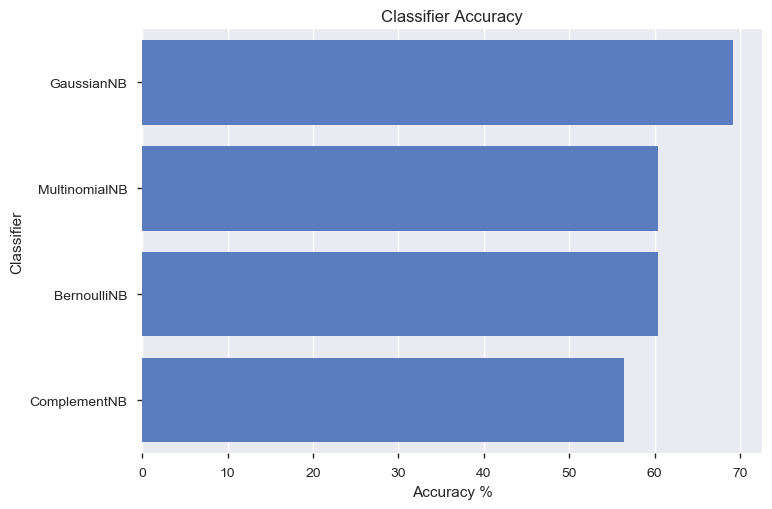

In [130]:
for clf in models:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 'Log Loss']], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
 
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

# Random Forest

In [131]:
feature_list = list(x1.columns)

y = np.array(y)

x1 = np.array(x1)

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, random_state=102)

In [ ]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

In [133]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [134]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_leaf_nodes=None,
            min_impurity_split=1e-03, min_samples_leaf=1,
            min_samples_split=2, n_estimators = 100, random_state = 102, 
            max_features = 'sqrt', n_jobs = 2,verbose = 1)
# Train the model on training data
rf.fit(x_train, y_train);

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Brandon

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Brandon

C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Brandon\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:283: DeprecationWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\Brandon

[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   39.1s finished


In [135]:
n_nodes = []
max_depths = []

for ind_tree in rf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')


Average number of nodes 20784
Average maximum depth 38


In [136]:
train_rf_predictions = model.predict(x_train)
train_rf_probs = model.predict_proba(x_train)[:, 1]

rf_predictions = model.predict(x_test)
rf_probs = model.predict_proba(x_test)[:, 1]

In [148]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=102)
tree.fit(x1, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=102,
            splitter='best')

In [149]:
# Make probability predictions
train_probs = tree.predict_proba(x_train)[:, 1]
probs = tree.predict_proba(x_test)[:, 1]

train_predictions = tree.predict(x_train)
predictions = tree.predict(x_test)

In [139]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.78 Train: 0.78
Precision Baseline: 0.4 Test: 0.47 Train: 0.48
Roc Baseline: 0.5 Test: 0.68 Train: 0.68


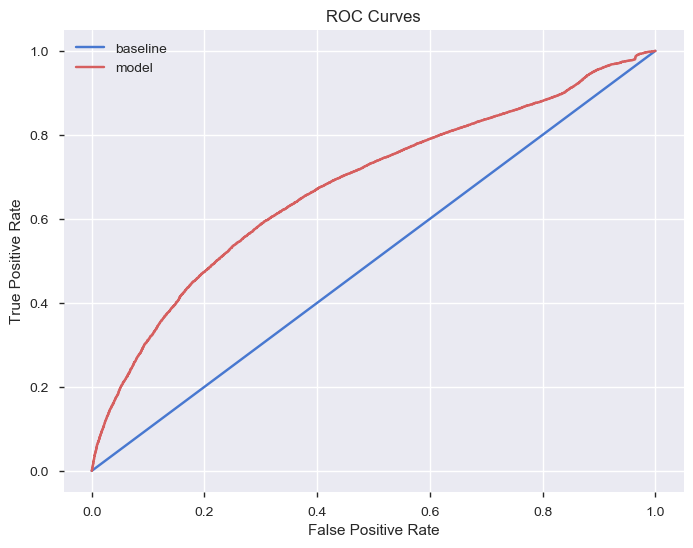

In [140]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [141]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[ 8143 11158]
 [ 2797  9885]]


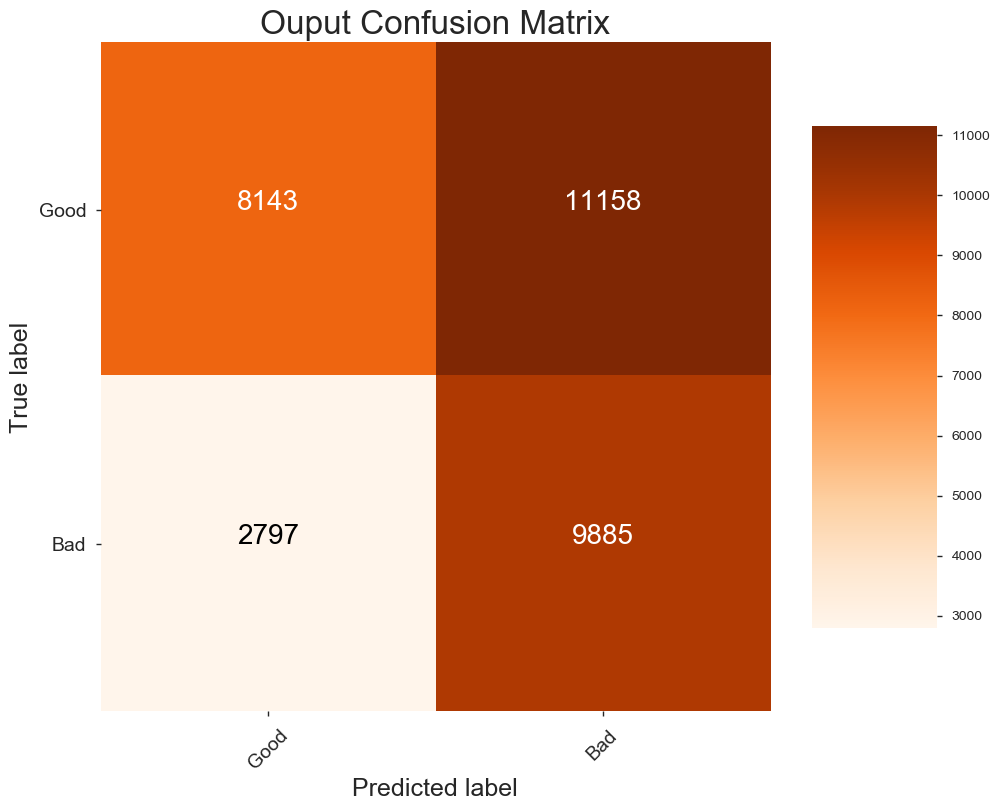

In [142]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['Good', 'Bad'],
                      title = 'Ouput Confusion Matrix')

In [143]:
# Features for feature importances
feat = pd.DataFrame(x_train)

features = list(feat.columns)

In [144]:
fi_rf = pd.DataFrame({'feature': features,
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi_rf.head(20)

feature  importance
22     x23    0.072705
43     x48    0.062117
19     x20    0.061703
44     x49    0.060377
37     x42    0.052960
36     x41    0.049963
11     x12    0.048814
33   Money    0.047301
26     x28    0.046728
25     x27    0.046408
35     x40    0.044877
6       x7    0.042072
5       x6    0.038868
41     x46    0.036528
28     x32    0.026492
24     x26    0.008349
12     x13    0.008317
14     x15    0.008297
30     x34    0.008274
3       x4    0.008246

In [145]:
import os    
print('Current working directory path:',os.getcwd())

Current working directory path: C:\Users\Brandon\Documents\GitHub\Quant_FINAL


# XGBoost

In [150]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [151]:

x2 = x1

y1 = y

x2 = StandardScaler().fit_transform(x2)

x_train, x_test, y_train, y_test = train_test_split(x2, y1, test_size=0.20, random_state=102)

In [152]:
XG = XGBClassifier()

XG.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [153]:
print(XG)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)


In [154]:
y_pred = XG.predict(x_test)
predictions = [round(value) for value in y_pred]

In [155]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.76%


Confusion matrix, without normalization
[[ 8143 11158]
 [ 2797  9885]]


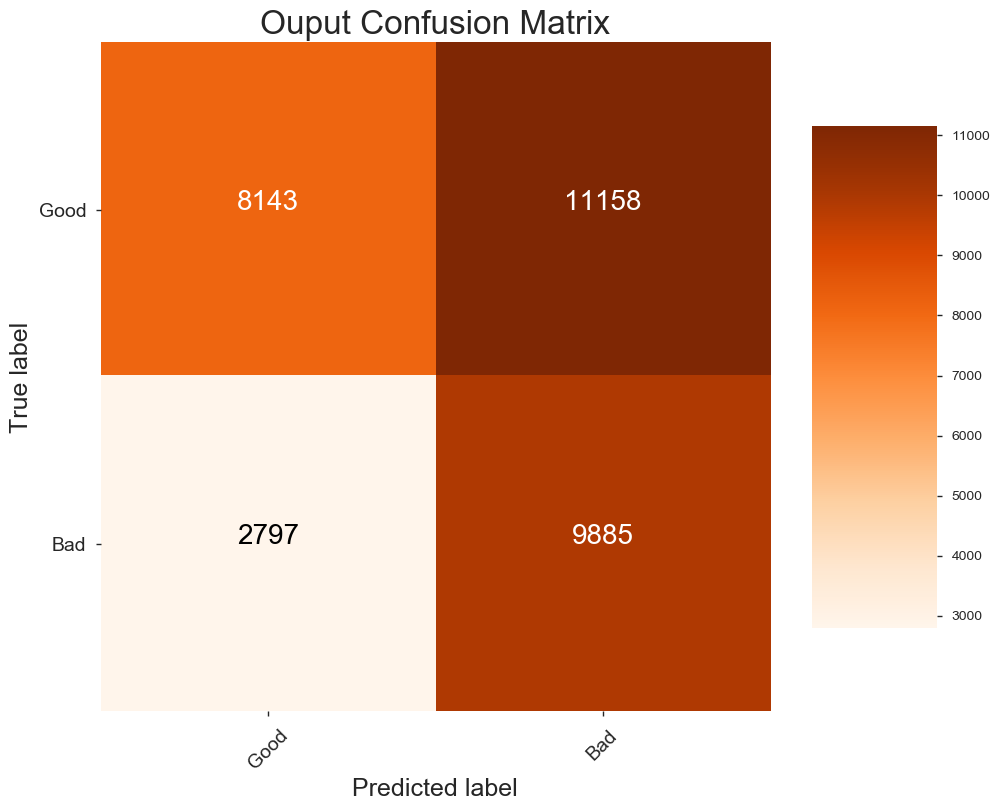

In [156]:
cmXG = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Good', 'Bad'],
                      title = 'Ouput Confusion Matrix')